# Simulation of pond system using Python-Control functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from control import input_output_response, NonlinearIOSystem

import control
control.__version__

'0.9.1'

In [2]:
from platform import python_version
python_version()

'3.9.12'

In [3]:
from pond_model_eqns import f, g, params, u_nop, x_nop

In [4]:
help(f)

Help on function f in module pond_model_eqns:

f(t, x, u, params)
    Continuous-time state-space model - dynamics function
    
        d/dt(x[t]) = f(x[t], u[t])
    
    Arguments
    ---------
    x : list or array
        State vector
    u : list or array
        Input vector



In [5]:
help(g)

Help on function g in module pond_model_eqns:

g(t, x, u, params)
    State-space model - measurement function
    
        y[t] = g(x[t], u[t])
    
    Arguments
    ---------
    x : list or array
        State vector
    u : list or array
        Input vector



In [6]:
sys = NonlinearIOSystem(f, outfcn=None, params=params, inputs=('Flow in (m^3/s)'), 
                        outputs=('Head on weir (m^3/s)'), states=('Head on weir (m^3/s)'),
                        name='Pond flow model')
print(sys)

System: Pond flow model
Inputs (1): Flow in (m^3/s), 
Outputs (1): Head on weir (m^3/s), 
States (1): Head on weir (m^3/s), 


## Step response

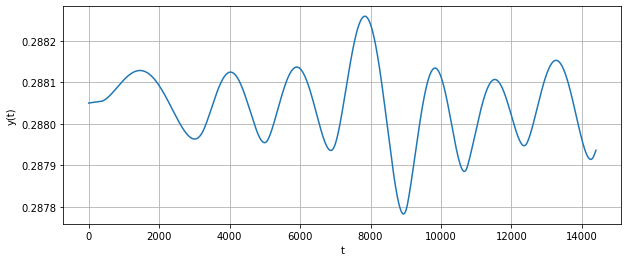

In [8]:
nT = 1800*4
Ts = 2
T = Ts*np.arange(0, nT+1)
t_step = 500

U = np.full(T.shape, u_nop[0], dtype=float)
U[T >= t_step] = u_nop[0] + 0
x0 = x_nop  # initial head
assert(U.shape == T.shape)
sim_out = input_output_response(sys, T, [U], x0, params=params)
y_resp = sim_out.y[0, :]

plt.figure(figsize=(10, 4))
plt.plot(T, y_resp)
#plt.ylim([0, 0.6])
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid()
plt.show()

In [9]:
y_resp.max(), y_resp.min()

(0.2882591137422301, 0.2877829515252764)

## Multiple step responses

In [10]:
nT = 1800
Ts = 2
T = Ts*np.arange(0, nT+1)
t_step = 500

y_resp = {}
for du in [-0.5, -0.25, 0, 0.25, 0.5]:
    U = np.full(T.shape, u_nop[0], dtype=float)
    U[T >= t_step] = u_nop[0] + du
    x0 = x_nop  # initial head
    assert(U.shape == T.shape)
    sim_out = input_output_response(sys, T, [U], x0, params=params)
    y_resp[du] = sim_out.y[0, :]

plt.figure(figsize=(10, 4))
for du, y in y_resp.items():
    plt.plot(sim_out.t, y, label=f"du = {du}")
#plt.ylim([0, 0.6])
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid()
plt.legend()
plt.show()

AssertionError: Out of bounds

In [11]:
U

array([1. , 1. , 1. , ..., 0.5, 0.5, 0.5])